# Comparative and Efficiency of Quarterbacks in the 2022 NFL Season from the Data

In the 2022 NFL season, quarterbacks have been analyzed on their comparative and efficiency levels. By analyzing data from the regular season, it has been determined which quarterbacks are performing at a higher level than others. The data shows that some quarterbacks have a higher passer rating and completion percentage compared to others.

Efficiency is an important factor in determining the success of a quarterback. By analyzing the data, it has been found that some quarterbacks have a higher efficiency rating than others. This indicates that they are able to complete passes with fewer attempts, making them more efficient overall.


### About Dataset

The terms you mentioned are player statistics commonly used in the NFL (National Football League) to measure a quarterback's performance. Dataset was scraped from [NFL website](https://www.nfl.com/stats/player-stats/category/passing/2022/reg/all/passingyards/desc). Here's a brief explanation of each statistic:

1. Player: The name of the player.
2. Pass Yds: Passing Yards, which represents the total number of yards the quarterback has thrown for.
3. Yds/Att: Yards per Attempt, which is the average number of passing yards gained by the quarterback on each attempt.
4. Att: Attempts, the number of times the quarterback has thrown the ball.
5. Cmp: Completions, the number of passes completed by the quarterback.
6. Cmp %: Completion Percentage, which is the ratio of completions to attempted passes, expressed as a percentage.
7. TD: Touchdowns, the number of passing touchdowns thrown by the quarterback.
8. INT: Interceptions, the number of passes intercepted by the opposing team.
9. Rate: Passer Rating, a formula-based statistic that measures a quarterback's overall performance.
10. 1st: First Downs, the number of times a quarterback has gained a first down through passing.
11. 1st%: First Down Percentage, the ratio of first downs gained to passing attempts, expressed as a percentage.
12. 20+: Passes of 20+ Yards, the number of passes completed for gains of 20 or more yards.
13. 40+: Passes of 40+ Yards, the number of passes completed for gains of 40 or more yards.
14. Lng: Longest Completion, the longest pass completed by the quarterback.
15. Sck: Sacks, the number of times the quarterback has been tackled behind the line of scrimmage.
16. SckY: Sack Yards, the total number of yards lost due to sacks.

Additional information came from [here](https://www.pro-football-reference.com/years/2022/passing.htm)

With the NFL player passing stats dataset, several analyses can be conducted to gain insights into quarterback performance and team strategies. For this project, we will perform:

- **Comparative analysis**: Compare the performance of different quarterbacks based on passing yards, completion percentage, touchdowns, interceptions, etc.
- **Efficiency analysis**: Analyze yards per attempt and passer rating to identify the most efficient quarterbacks.


**Aims and Objetives**:

- Analyze quarterback passing stats and performance data to identify optimal play calling strategies based on situational factors, opponent tendencies, and individual quarterback strengths.

- Utilize passing stats and performance data to identify areas of improvement for quarterbacks, enabling the development of targeted training programs and strategies to enhance their skills.

_These objectives highlight some potential areas where data analysis can contribute to solving real-world challenges in NFL quarterback recruitments, rewards, and overall team performance._

## Importing necessary libraries

In [39]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 #chloropleth or map

import warnings

In [40]:
# Load dataset
df = pd.read_csv('/content/player_stats_passing.csv')
df.head()

,Player,Team,Age,Pos,Pass Yds,Yds/Att,Att,Cmp,Cmp%,TD,...,INT,INT%,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,Patrick Mahomes,KAN,27,QB,5250,8.1,648,435,67.1,41,...,12.0,1.9,105.2,272,42.0,73,13,67,26.0,188.0
1,Justin Herbert,LAC,24,QB,4739,6.8,699,477,68.2,25,...,10.0,1.4,93.2,228,32.6,50,7,55,38.0,206.0
2,Tom Brady,TAM,45,QB,4694,6.4,733,490,66.8,25,...,9.0,1.2,90.7,237,32.3,50,8,63,22.0,160.0
3,Kirk Cousins,MIN,34,QB,4547,7.1,643,424,65.9,29,...,14.0,2.2,92.5,230,35.8,47,10,66,46.0,329.0
4,Joe Burrow,CIN,26,QB,4475,7.4,606,414,68.3,35,...,12.0,2.0,100.8,219,36.1,53,10,60,41.0,259.0


In [41]:
df.shape

(100, 21)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    100 non-null    object 
 1   Team      100 non-null    object 
 2   Age       100 non-null    int64  
 3   Pos       100 non-null    object 
 4   Pass Yds  100 non-null    int64  
 5   Yds/Att   100 non-null    float64
 6   Att       100 non-null    int64  
 7   Cmp       100 non-null    int64  
 8   Cmp%      100 non-null    float64
 9   TD        100 non-null    int64  
 10  TD%       100 non-null    float64
 11  INT       100 non-null    float64
 12  INT%      100 non-null    float64
 13  Rate      100 non-null    float64
 14  1st       100 non-null    int64  
 15  1st%      100 non-null    float64
 16  20+       100 non-null    int64  
 17  40+       100 non-null    int64  
 18  Lng       100 non-null    int64  
 19  Sck       96 non-null     float64
 20  SckY      96 non-null     float64

In [43]:
# Get the number of unique values in each feature
df.nunique()

Player      100
Team         33
Age          19
Pos           5
Pass Yds     88
Yds/Att      53
Att          77
Cmp          71
Cmp%         69
TD           26
TD%          42
INT          17
INT%         42
Rate         83
1st          60
1st%         66
20+          38
40+          13
Lng          59
Sck          35
SckY         66
dtype: int64

## Possible analyses for consideration

All of the types of analysis you mentioned are important and can provide valuable insights. The choice of which one to prioritize depends on your research questions and goals.

- We are interested in comparing the performance of different quarterbacks, a **comparative analysis** could be a good place to start. This analysis would involve looking at passing yards, completion percentage, touchdowns, interceptions, and other performance metrics and comparing them across different quarterbacks to identify patterns and trends.

- I am also interested in identifying the most efficient quarterbacks, an **efficiency analysis** could be a good choice. This analysis would involve looking at yards per attempt and passer rating to identify quarterbacks who are able to gain a lot of yards per attempt and who have high passer ratings, which are indicators of efficiency.


In [44]:
# Calculate some basic statistics
num_players = len(df)
total_yards = df['Pass Yds'].sum()
avg_yards = df['Pass Yds'].mean()

# Print the results
print(f'Number of players: {num_players}')
print(f'Total passing yards: {total_yards}')
print(f'Average passing yards per player: {avg_yards}')

Number of players: 100
Total passing yards: 127035
Average passing yards per player: 1270.35


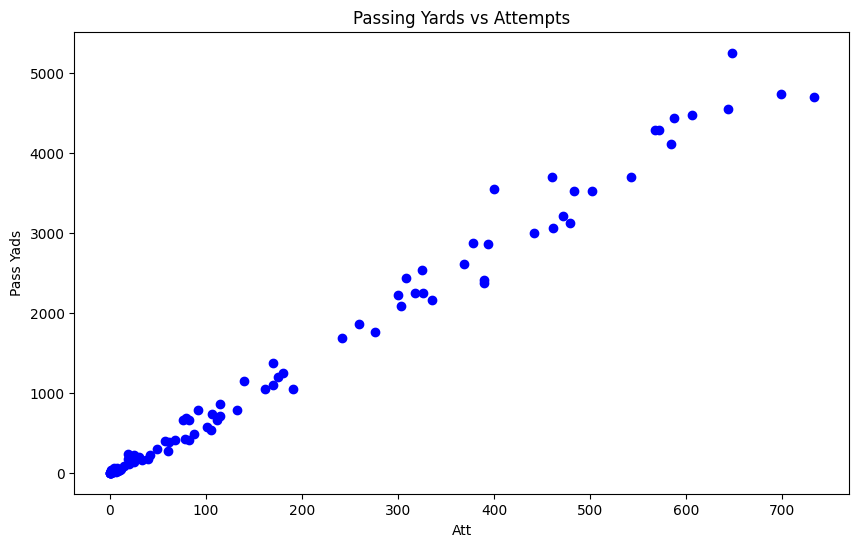

In [45]:
# Create scatter plot of pass Yds vs Att
plt.figure(figsize=(10, 6))
plt.scatter(df['Att'], df['Pass Yds'], color='blue')
plt.xlabel('Att')
plt.ylabel('Pass Yads')
plt.title('Passing Yards vs Attempts')
plt.show()

### OBSERVATION:
The scatterplot for passing yards vs attempts shows a linear relationship; it means that there is a correlation between the two variables. In this case, it suggests that as the number of pass attempts increases, the number of passing yards also tends to increase.


I created a heatmap of `Pass Yards by Player` to visualize passing patterns.

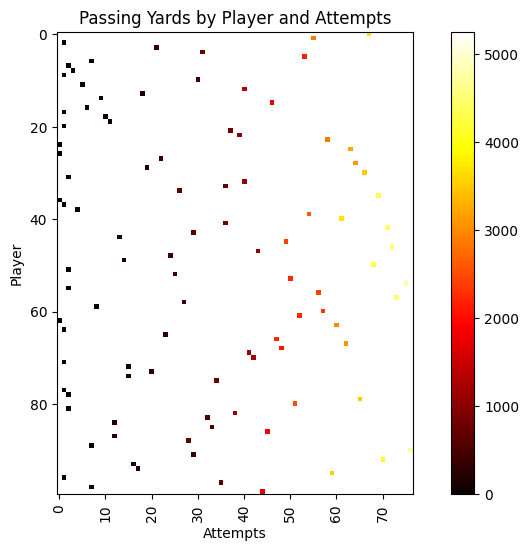

In [46]:
# Create heatmap of Pass Yds by Player
plt.figure(figsize=(10, 6))
pass_yds_by_player = df.pivot_table(
    values='Pass Yds',
    index='Player',
    columns='Att'
)
plt.imshow(pass_yds_by_player, cmap='hot', interpolation='nearest')
plt.xticks(rotation=90)
plt.xlabel('Attempts')
plt.ylabel('Player')
plt.title('Passing Yards by Player and Attempts')
plt.colorbar()
plt.show()

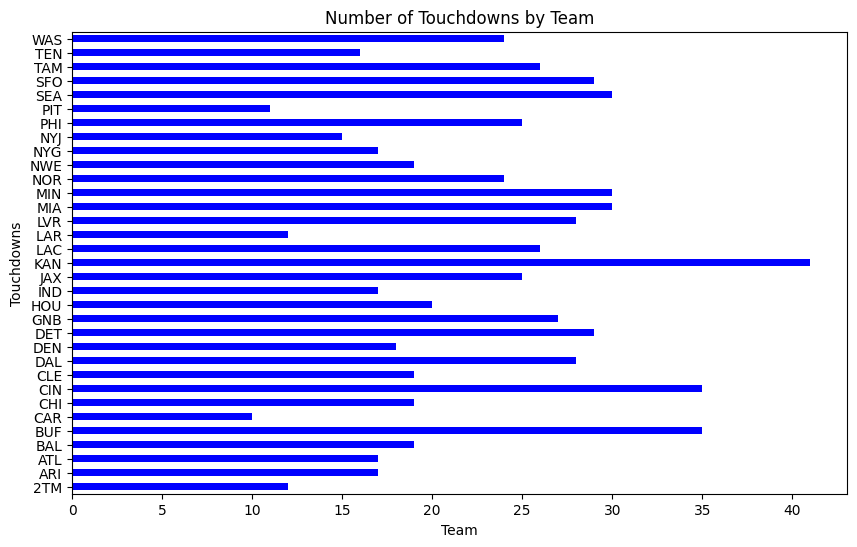

In [47]:
# Group the data by player and sum the number of touchdowns
plt.figure(figsize=(10, 6))
td_by_player = df.groupby('Team')['TD'].sum()

td_by_player.plot(kind='barh', color='blue')
plt.xlabel('Team')
plt.ylabel('Touchdowns')
plt.title('Number of Touchdowns by Team')
plt.show()

## Filter the data to show only the quarterbacks' passing data

In [48]:
# Select only the quarterbacks' passing data
qb_df = df[df['Pos'] == 'QB']
print(qb_df.shape)
qb_df.head()

(81, 21)


,Player,Team,Age,Pos,Pass Yds,Yds/Att,Att,Cmp,Cmp%,TD,...,INT,INT%,Rate,1st,1st%,20+,40+,Lng,Sck,SckY
0,Patrick Mahomes,KAN,27,QB,5250,8.1,648,435,67.1,41,...,12.0,1.9,105.2,272,42.0,73,13,67,26.0,188.0
1,Justin Herbert,LAC,24,QB,4739,6.8,699,477,68.2,25,...,10.0,1.4,93.2,228,32.6,50,7,55,38.0,206.0
2,Tom Brady,TAM,45,QB,4694,6.4,733,490,66.8,25,...,9.0,1.2,90.7,237,32.3,50,8,63,22.0,160.0
3,Kirk Cousins,MIN,34,QB,4547,7.1,643,424,65.9,29,...,14.0,2.2,92.5,230,35.8,47,10,66,46.0,329.0
4,Joe Burrow,CIN,26,QB,4475,7.4,606,414,68.3,35,...,12.0,2.0,100.8,219,36.1,53,10,60,41.0,259.0


## Comparative Analysis

## Select the relevant features for comparative analysis

In [49]:
# Select the statistical categories to compare
comparative_features = ['Player', 'Team', 'Pass Yds', 'Cmp%', 'TD', 'INT']

# Create a new DataFrame with only the selected categories
comparative_df = qb_df[comparative_features]

# Sort the dataframe by passing yards in descending order
sorted_df = comparative_df.sort_values('Pass Yds', ascending=False)

### Create a table or chart to display the data and compare the quarterbacks' performance in each category.

In [50]:
# Create a table to display the data by passing yards
table = pd.pivot_table(sorted_df, values=['Pass Yds', 'Cmp%', 'TD', 'INT'], index=['Player'], aggfunc='max')
table

,Cmp%,INT,Pass Yds,TD
Player,,,,
Aaron Rodgers,64.6,12.0,3695,26
Andy Dalton,66.7,9.0,2871,18
Anthony Brown,44.9,2.0,302,0
Bailey Zappe,70.6,3.0,781,5
Baker Mayfield,60.0,8.0,2163,10
...,...,...,...,...
Trey Lance,48.4,1.0,194,0
Tua Tagovailoa,64.8,8.0,3548,25
Tyler Huntley,67.0,3.0,658,2


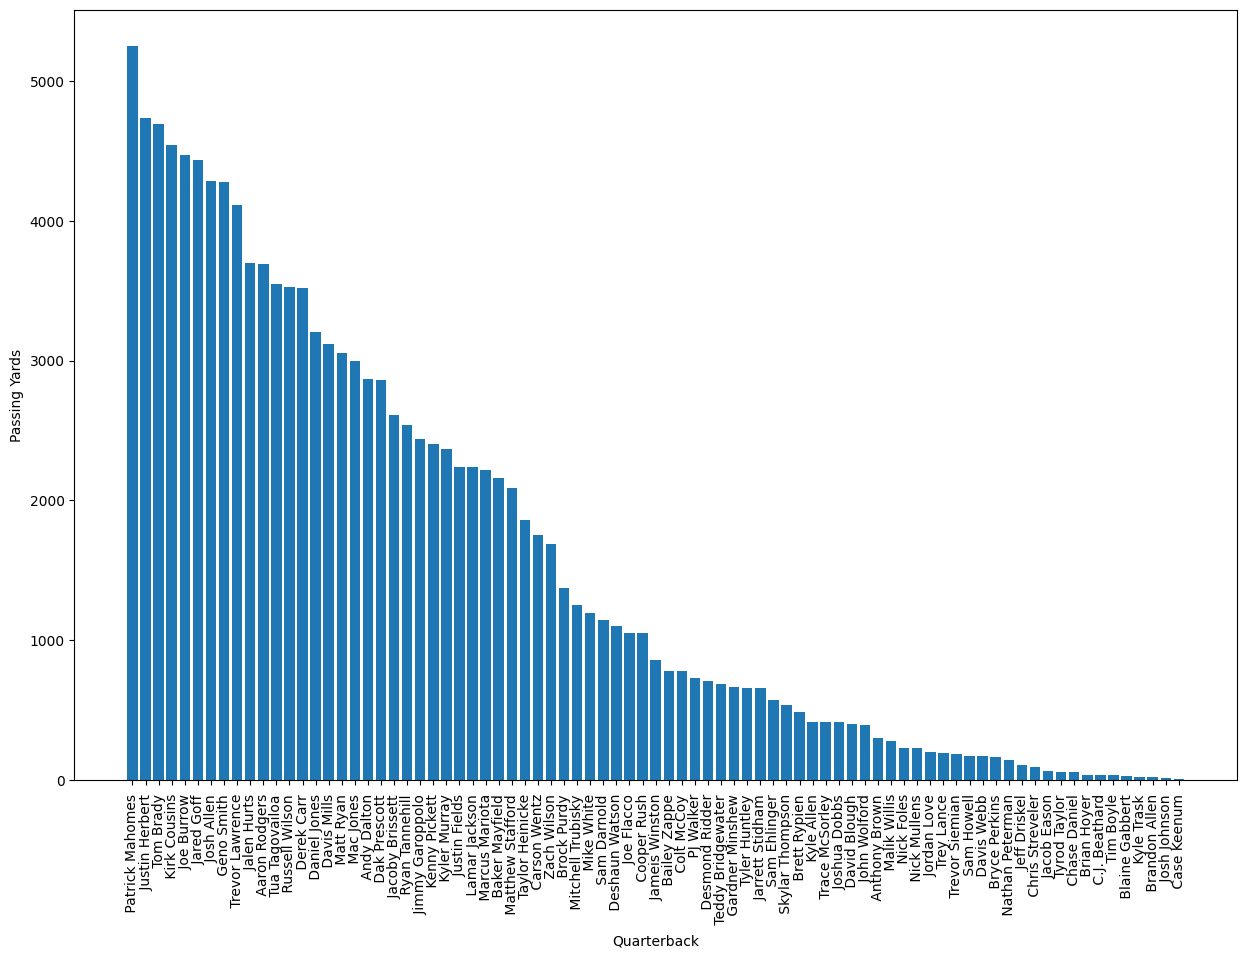

In [67]:
# Create a bar chart to compare passing yards for each quarterback
plt.figure(figsize=(15, 10))
plt.bar(sorted_df['Player'], sorted_df['Pass Yds'])
plt.xticks(rotation=90)
plt.xlabel('Quarterback')
plt.ylabel('Passing Yards')
plt.show()

In [52]:
# Summary statistics
comparative_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pass Yds,81.0,1563.345679,1533.345486,8.0,224.0,858.0,2608.0,5250.0
Cmp%,81.0,62.266667,9.982585,25.0,58.8,63.4,66.7,100.0
TD,81.0,9.185185,10.445228,0.0,1.0,4.0,15.0,41.0
INT,81.0,5.111111,4.315669,0.0,2.0,4.0,8.0,15.0


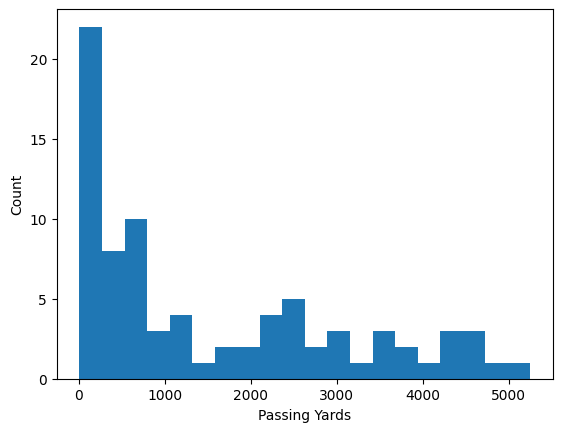

In [53]:
# Histogram of passing yards
plt.hist(qb_df['Pass Yds'], bins=20)
plt.xlabel('Passing Yards')
plt.ylabel('Count')
plt.show()

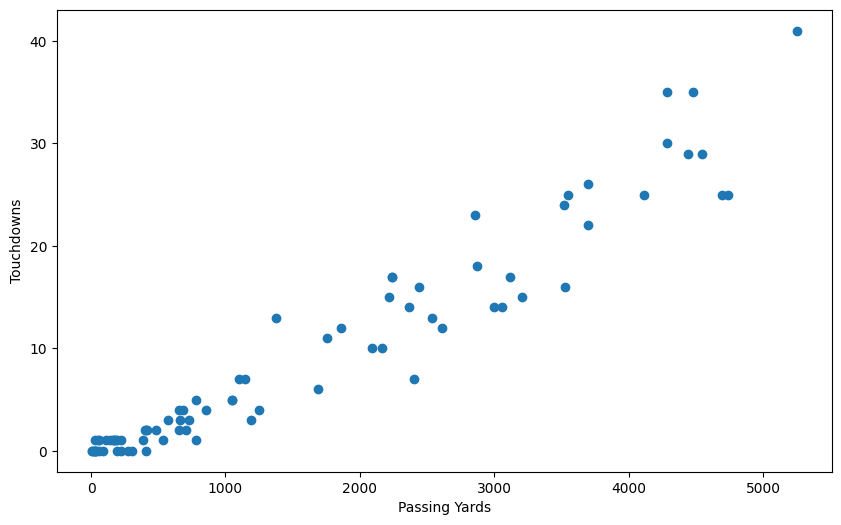

In [54]:
# Scatter plot of passing yards vs touchdowns
plt.figure(figsize=(10, 6))
plt.scatter(qb_df['Pass Yds'], qb_df['TD'])
plt.xlabel('Passing Yards')
plt.ylabel('Touchdowns')
plt.show()

<Figure size 1000x600 with 0 Axes>

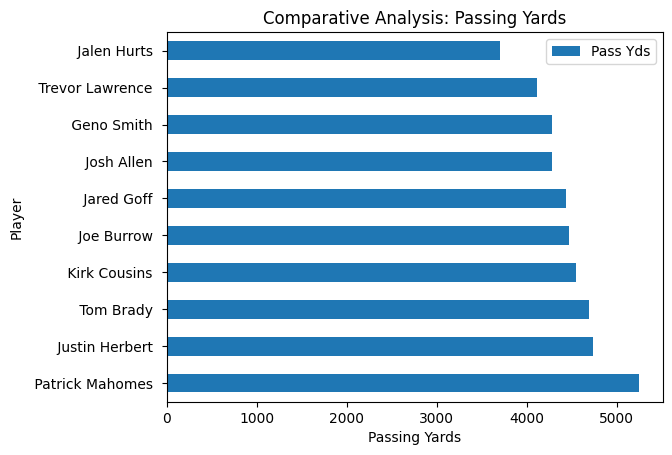

In [55]:
# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
qb_df.head(10).plot(x='Player', y='Pass Yds', kind='barh')

# Adding labels and title to the plot
plt.xlabel('Passing Yards')
plt.ylabel('Player')
plt.title('Comparative Analysis: Passing Yards')

# Displaying the plot
plt.show()

### Analyze the data and draw conclusions about which quarterbacks performed better or worse in each category

In [56]:
# Select the statistical categories to compare
comparative_df = ['Player', 'Team', 'Pass Yds', 'Cmp%', 'TD', 'Int']

# Calculate the mean and median passing yards for all quarterbacks
mean_yards = sorted_df['Pass Yds'].mean()
median_yards = sorted_df['Pass Yds'].median()

# Print the mean and median passing yards
print('Mean passing yards:', mean_yards)
print('Median passing yards:', median_yards)

Mean passing yards: 1563.3456790123457
Median passing yards: 858.0


In [57]:
# Calculate the correlation between passing yards and touchdowns
correlation = sorted_df['Pass Yds'].corr(sorted_df['TD'])

# Print the correlation coefficient
print('Correlation between passing yards and touchdowns:', correlation)

Correlation between passing yards and touchdowns: 0.9633459011221904


In [58]:
# Calculate the top 5 quarterbacks by passing yards
top_yards = sorted_df.head(5)

# Print the top 5 quarterbacks by passing yards
print('Top 5 quarterbacks by passing yards:')
print(top_yards[['Player', 'Team', 'Pass Yds']])

Top 5 quarterbacks by passing yards:
              Player Team  Pass Yds
0   Patrick Mahomes   KAN      5250
1    Justin Herbert   LAC      4739
2         Tom Brady   TAM      4694
3      Kirk Cousins   MIN      4547
4        Joe Burrow   CIN      4475


In [59]:
# Calculate the bottom 5 quarterbacks by interceptions
bottom_ints = sorted_df.tail(5)

# Print the bottom 5 quarterbacks by interceptions
print('Bottom 5 quarterbacks by interceptions:')
print(bottom_ints[['Player', 'Team', 'INT']])


Bottom 5 quarterbacks by interceptions:
              Player Team  INT
79   Blaine Gabbert   TAM  0.0
81       Kyle Trask   TAM  0.0
82    Brandon Allen   CIN  0.0
86     Josh Johnson   SFO  0.0
87      Case Keenum   BUF  0.0


## Select the features for efficiency analysis

In [60]:
# Filter the data to show only quarterbacks' passing stats
qb_data = df[df['Pos'] == 'QB']

qb_data[['Player', 'Team', 'INT%']]

,Player,Team,INT%
0,Patrick Mahomes,KAN,1.9
1,Justin Herbert,LAC,1.4
2,Tom Brady,TAM,1.2
3,Kirk Cousins,MIN,2.2
4,Joe Burrow,CIN,2.0
...,...,...,...
79,Blaine Gabbert,TAM,0.0
81,Kyle Trask,TAM,0.0
82,Brandon Allen,CIN,0.0
86,Josh Johnson,SFO,0.0


In [61]:
# Select the features for efficiency analysis
efficiency_features = ['Player', 'Cmp%', 'Yds/Att', 'TD', 'INT%']

efficiency_data = qb_df[efficiency_features]
efficiency_data

,Player,Cmp%,Yds/Att,TD,INT%
0,Patrick Mahomes,67.1,8.1,41,1.9
1,Justin Herbert,68.2,6.8,25,1.4
2,Tom Brady,66.8,6.4,25,1.2
3,Kirk Cousins,65.9,7.1,29,2.2
4,Joe Burrow,68.3,7.4,35,2.0
...,...,...,...,...,...
79,Blaine Gabbert,75.0,3.6,1,0.0
81,Kyle Trask,33.3,2.6,0,0.0
82,Brandon Allen,100.0,7.3,0,0.0
86,Josh Johnson,50.0,5.0,0,0.0


In [62]:
# Selecting the required columns for efficiency analysis
efficiency_df = qb_df[['Player', 'Yds/Att', 'Rate']]

# Sorting the dataframe by yards per attempt in descending order
efficiency_df = efficiency_df.sort_values('Yds/Att', ascending=False)

# Displaying the top 10 quarterbacks based on yards per attempt
print(efficiency_df.head(10))

                 Player  Yds/Att   Rate
71         Jacob Eason      11.8   61.7
62         Jordan Love       9.3  112.2
61        Nick Mullens       9.0  100.7
11      Tua Tagovailoa       8.9  105.5
65          Sam Howell       8.9   83.0
46     Gardner Minshew       8.7   83.4
45   Teddy Bridgewater       8.6   85.6
41        Bailey Zappe       8.5  100.9
36         Sam Darnold       8.2   92.6
0      Patrick Mahomes       8.1  105.2


In [63]:
# Sorting the dataframe by passer rating in descending order
efficiency_df = efficiency_df.sort_values('Rate', ascending=False)

# Displaying the top 10 quarterbacks based on passer rating
print(efficiency_df.head(10))

               Player  Yds/Att   Rate
79    Blaine Gabbert       3.6  119.3
62       Jordan Love       9.3  112.2
33       Brock Purdy       8.1  107.3
11    Tua Tagovailoa       8.9  105.5
0    Patrick Mahomes       8.1  105.2
73      Chase Daniel       4.3  103.5
22   Jimmy Garoppolo       7.9  103.0
9        Jalen Hurts       8.0  101.6
7         Geno Smith       7.5  100.9
41      Bailey Zappe       8.5  100.9


In [64]:
# Group the data by player and calculate the mean and standard deviation for each metric
qb_stats = qb_df.groupby('Player').agg(
    PassYards=('Pass Yds', 'mean'),
    CompletionPct=('Cmp%', 'mean'),
    TD=('TD', 'sum'),
    Int=('INT', 'sum'),
    YardsPerAttempt=('Yds/Att', 'mean'),
    PasserRating=('Rate', 'mean'),
    FirstDownPct=('1st%', 'mean')
).reset_index()

In [65]:
qb_stats

,Player,PassYards,CompletionPct,TD,Int,YardsPerAttempt,PasserRating,FirstDownPct
0,Aaron Rodgers,3695.0,64.6,26,12.0,6.8,91.1,32.7
1,Andy Dalton,2871.0,66.7,18,9.0,7.6,95.2,35.7
2,Anthony Brown,302.0,44.9,0,2.0,6.2,48.2,26.5
3,Bailey Zappe,781.0,70.6,5,3.0,8.5,100.9,40.2
4,Baker Mayfield,2163.0,60.0,10,8.0,6.5,79.0,28.1
...,...,...,...,...,...,...,...,...
76,Trey Lance,194.0,48.4,0,1.0,6.3,55.0,19.4
77,Tua Tagovailoa,3548.0,64.8,25,8.0,8.9,105.5,40.5
78,Tyler Huntley,658.0,67.0,2,3.0,5.9,77.2,27.7
79,Tyrod Taylor,58.0,75.0,1,1.0,7.2,94.8,37.5


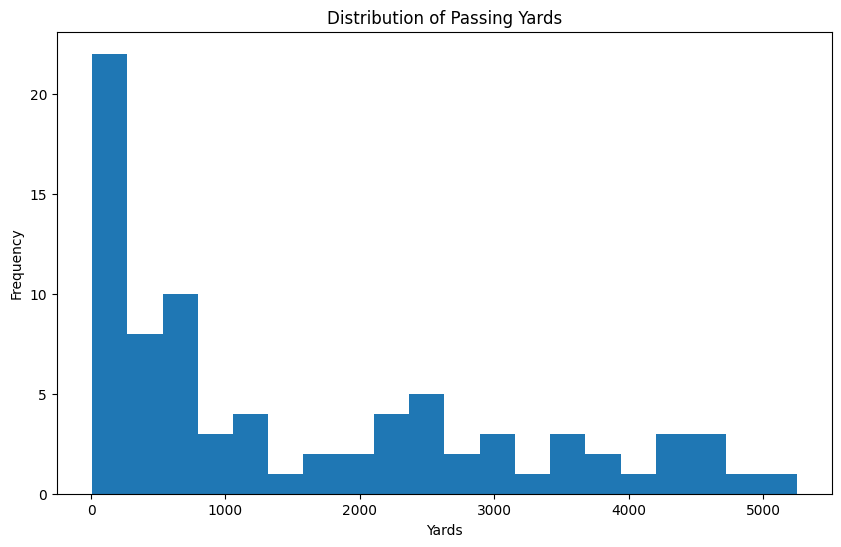

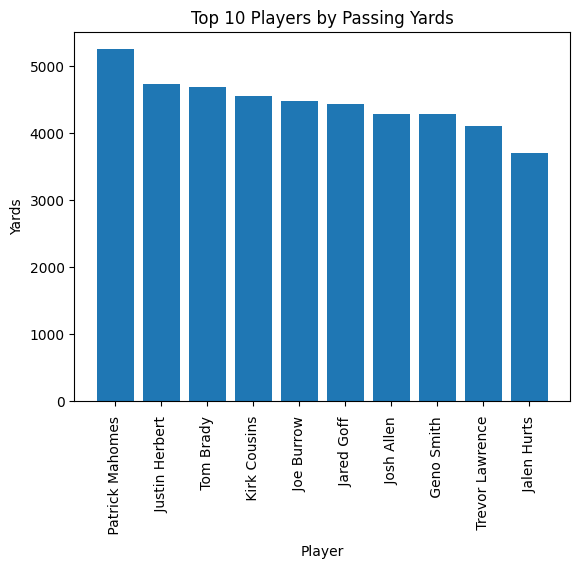

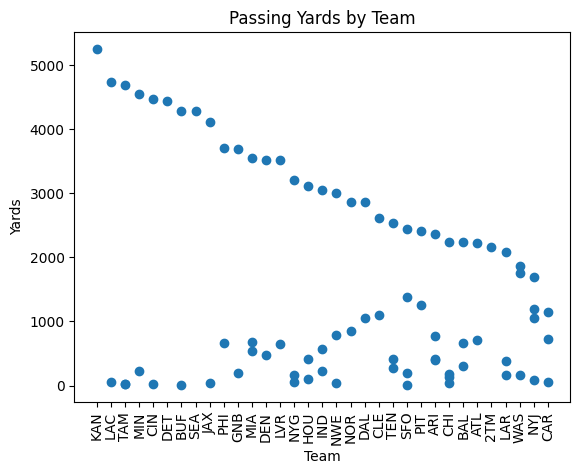

In [66]:
plt.figure(figsize=(10, 6))
# create a histogram of passing yards
plt.hist(qb_df['Pass Yds'], bins=20)
plt.title('Distribution of Passing Yards')
plt.xlabel('Yards')
plt.ylabel('Frequency')
plt.show()

# create a bar chart of the top 10 players by passing yards
top_players = qb_df.sort_values(by='Pass Yds', ascending=False).head(10)
plt.bar(top_players['Player'], top_players['Pass Yds'])
plt.title('Top 10 Players by Passing Yards')
plt.xlabel('Player')
plt.ylabel('Yards')
plt.xticks(rotation=90)
plt.show()

# create a scatter plot of passing yards vs. team
plt.scatter(qb_df['Team'], qb_df['Pass Yds'])
plt.title('Passing Yards by Team')
plt.xlabel('Team')
plt.ylabel('Yards')
plt.xticks(rotation=90)
plt.show()